In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Opening the CSV files
test = pd.read_csv('test_data.csv', encoding='cp1252')
training = pd.read_csv('training_data.csv', encoding='cp1252')

In [3]:
# Checking the column names
training.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
# Dataset Head
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Dataset Info
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Dataset Description
training.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# Checking gender qualitative qualifiers
training['gender'].unique()

array(['female', 'male'], dtype=object)

In [8]:
# Checking race/ethnicity qualitative qualifiers
training['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
# Checking parental level of education qualitative qualifiers
training['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
# Checking lunch qualitative qualifiers
training['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
# Checking test preparation course qualitative qualifiers
training['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [12]:
# Changing qualitative qualifiers to quantitative qualifiers
training_gender_qt = {'male': 1, 'female': 2}
training_race_qt = {'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5}
training_parentalEducation_qt = {'some high school': 1, 'some college': 2, 'high school': 3, "associate's degree": 4, "master's degree": 5, "bachelor's degree": 6}
training_lunch_qt = {'free/reduced': 1, 'standard' : 2}
training_testPreparation_qt = {'none': 1, 'completed': 2}

training.replace(training_gender_qt, inplace = True)
training.replace(training_race_qt, inplace = True)
training.replace(training_parentalEducation_qt, inplace = True)
training.replace(training_lunch_qt, inplace = True)
training.replace(training_testPreparation_qt, inplace = True)

test.replace(training_gender_qt, inplace = True)
test.replace(training_race_qt, inplace = True)
test.replace(training_parentalEducation_qt, inplace = True)
test.replace(training_lunch_qt, inplace = True)
test.replace(training_testPreparation_qt, inplace = True)

In [13]:
# Changing the 0-100 notes to 1-5
#training["math score"] = pd.cut(training["math score"], bins=[-1, 59, 69, 79, 89, 100], labels=[1, 2, 3, 4, 5])
#training["reading score"] = pd.cut(training["reading score"], bins=[-1, 59, 69, 79, 89, 100], labels=[1, 2, 3, 4, 5])
training["writing score"] = pd.cut(training["writing score"], bins=[-1, 59, 69, 79, 89, 100], labels=[1, 2, 3, 4, 5])

In [14]:
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,2,6,2,1,72,72,3
1,2,3,2,2,2,69,90,4
2,2,2,5,2,1,90,95,5
3,1,1,4,1,1,47,57,1
4,1,3,2,2,1,76,78,3


In [15]:
# Checking if there is any missing values
training.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [16]:
# Though there isn't any missing values, we'll use this code lines for check reasons
print(training.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


<AxesSubplot:>

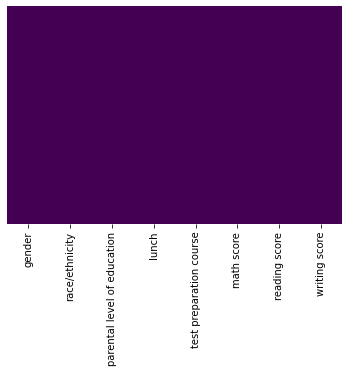

In [17]:
# Checking our dataset heatmap
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   int64   
 1   race/ethnicity               1000 non-null   int64   
 2   parental level of education  1000 non-null   int64   
 3   lunch                        1000 non-null   int64   
 4   test preparation course      1000 non-null   int64   
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   category
dtypes: category(1), int64(7)
memory usage: 56.0 KB


<AxesSubplot:>

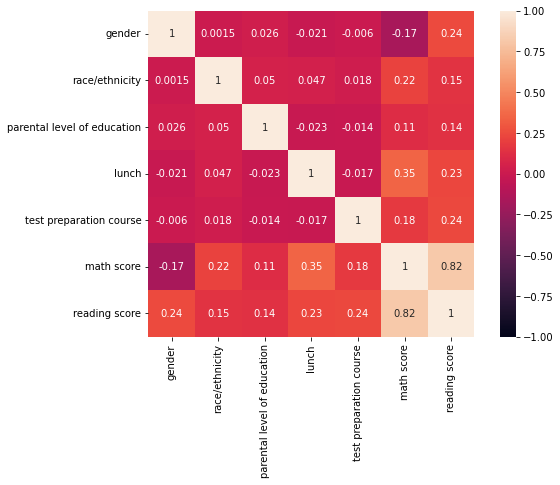

In [19]:
# Checking the correlation matrix
corr_matrix = training.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [20]:
# Visualize how the dataset is at this moment 
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,2,6,2,1,72,72,3
1,2,3,2,2,2,69,90,4
2,2,2,5,2,1,90,95,5
3,1,1,4,1,1,47,57,1
4,1,3,2,2,1,76,78,3


In [21]:
# Starting to prepare the Predicitions

X = training.drop(['writing score'], axis=1)
y = training['writing score']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2021)

<AxesSubplot:xlabel='writing score', ylabel='count'>

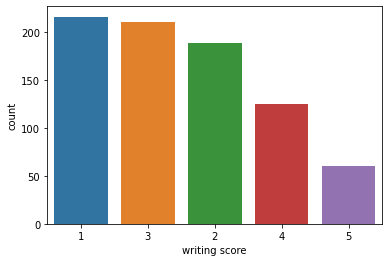

In [23]:
# Checking the values in y_train
sns.countplot(x = y_train, order = training['writing score'].value_counts().index)

<AxesSubplot:xlabel='writing score', ylabel='count'>

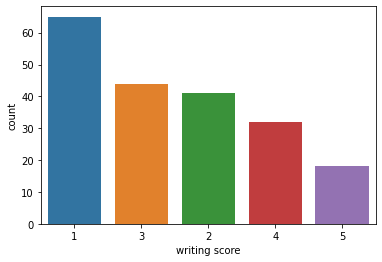

In [24]:
# Checking if the values in y_test look like the ones in y_train 
sns.countplot(x = y_test, order = training['writing score'].value_counts().index)

In [25]:
# Using the Decision Tree Classifier Regression method

from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

predictions = treemodel.predict(X_test)
predictions

array([2, 4, 2, 1, 4, 1, 2, 1, 1, 4, 4, 3, 1, 4, 2, 1, 1, 5, 5, 2, 3, 3,
       3, 3, 4, 1, 4, 2, 1, 2, 4, 1, 1, 1, 5, 4, 1, 1, 5, 1, 3, 1, 3, 1,
       4, 3, 3, 3, 1, 3, 2, 3, 1, 4, 1, 3, 1, 1, 3, 3, 5, 3, 4, 2, 2, 1,
       2, 1, 3, 1, 3, 4, 1, 4, 2, 4, 4, 2, 2, 3, 3, 2, 3, 3, 2, 2, 1, 4,
       2, 2, 2, 1, 4, 3, 3, 3, 5, 3, 2, 2, 3, 3, 1, 4, 2, 4, 5, 3, 1, 2,
       1, 4, 3, 1, 1, 4, 1, 5, 2, 4, 4, 3, 2, 2, 4, 2, 3, 1, 5, 3, 2, 5,
       5, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 5, 1, 4, 3, 1, 4, 1, 3, 2, 2, 2,
       2, 1, 1, 5, 1, 5, 3, 4, 2, 3, 1, 2, 1, 1, 3, 5, 2, 1, 1, 4, 3, 5,
       2, 1, 2, 1, 1, 1, 3, 2, 1, 2, 4, 2, 2, 3, 2, 3, 1, 5, 5, 2, 1, 2,
       1, 2], dtype=int64)

              precision    recall  f1-score   support

           1       0.88      0.80      0.84        65
           2       0.53      0.63      0.58        41
           3       0.61      0.61      0.61        44
           4       0.50      0.47      0.48        32
           5       0.61      0.61      0.61        18

    accuracy                           0.66       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.67      0.66      0.66       200

You have got  0.66 accuracy  in this prediction


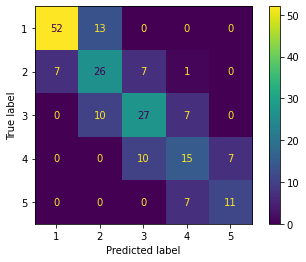

In [26]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=treemodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=treemodel.classes_)
disp.plot()

In [27]:
# Using the Linear Regression method

from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

predictions = linearmodel.predict(X_test)
predictions

array([ 2.82838193,  3.14105421,  2.25284359,  0.80382444,  3.23514394,
        0.42456289,  2.45428743,  1.31360833,  1.59018656,  3.38510041,
        3.22613712,  3.00907495,  1.08079732,  3.62949253,  1.90453377,
        1.77244794,  2.03988375,  3.89319015,  5.11753938,  2.05986082,
        2.32220025,  3.47713758,  3.3159835 ,  3.17246351,  3.39681479,
        1.68534159,  3.55359206,  2.44449412,  0.98284089,  2.16142418,
        4.12670921,  1.45832133,  1.72475716,  1.65464725,  4.24213218,
        3.7842315 ,  1.67512018,  1.70595012,  4.8623734 ,  1.07468677,
        3.06793495,  0.70563237,  2.59604717,  1.72233472,  3.07009961,
        3.2133196 ,  2.79006728,  2.78659067,  1.55270175,  3.44591814,
        1.75340011,  2.69025017,  1.02510956,  4.23984678,  1.00589004,
        2.72550818,  1.4887024 , -0.05010197,  3.63187082,  2.86249688,
        4.89667247,  3.52637537,  3.73074249,  3.11124775,  3.10178016,
        0.95147354,  3.05180398,  1.61013473,  2.36342882,  1.24

You have got  0.85 accuracy  in this prediction


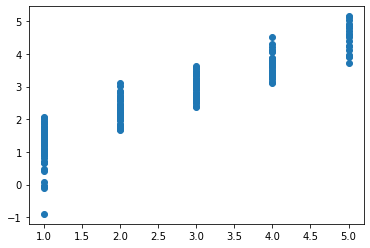

In [28]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score

# Printing the results

print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % r2_score(y_test, predictions))

plt.scatter(y_test, predictions)

In [29]:
# Using the Logistic Regression method

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
predictions

array([3, 3, 2, 1, 3, 1, 2, 1, 1, 3, 3, 3, 1, 4, 1, 1, 2, 4, 5, 2, 2, 4,
       3, 3, 4, 1, 4, 2, 1, 2, 4, 1, 1, 1, 5, 4, 1, 1, 5, 1, 3, 1, 3, 1,
       3, 4, 3, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 1, 4, 3, 5, 4, 4, 3, 3, 1,
       3, 1, 2, 1, 3, 3, 1, 5, 3, 4, 4, 1, 2, 3, 4, 2, 2, 3, 1, 3, 1, 4,
       2, 3, 3, 1, 4, 3, 2, 3, 5, 3, 2, 2, 2, 3, 1, 4, 2, 4, 5, 3, 1, 3,
       2, 5, 3, 1, 1, 4, 1, 4, 1, 4, 4, 3, 2, 1, 4, 2, 4, 1, 4, 3, 2, 4,
       4, 1, 2, 4, 3, 1, 2, 1, 3, 1, 1, 5, 1, 4, 3, 1, 3, 1, 3, 2, 3, 1,
       1, 1, 1, 5, 1, 4, 2, 5, 2, 3, 2, 2, 1, 1, 3, 5, 2, 1, 1, 4, 3, 4,
       2, 1, 3, 1, 2, 1, 4, 1, 1, 2, 3, 3, 2, 3, 2, 3, 1, 5, 5, 2, 1, 2,
       1, 2], dtype=int64)

              precision    recall  f1-score   support

           1       0.92      0.91      0.91        65
           2       0.68      0.61      0.64        41
           3       0.62      0.70      0.66        44
           4       0.63      0.69      0.66        32
           5       0.86      0.67      0.75        18

    accuracy                           0.74       200
   macro avg       0.74      0.72      0.72       200
weighted avg       0.75      0.74      0.75       200

You have got  0.74500 accuracy  in this prediction


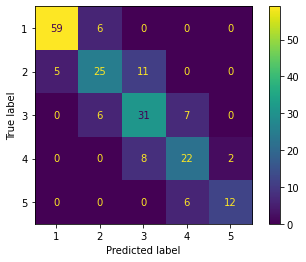

In [30]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.5f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))


#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot()

In [31]:
# Using the Logistic Regression method

from sklearn.svm import SVC

svcmodel = SVC(random_state=2021)
svcmodel.fit(X_train, np.ravel(y_train))

predictions = svcmodel.predict(X_test)
predictions

array([3, 3, 3, 1, 3, 1, 2, 1, 2, 3, 3, 3, 1, 3, 1, 1, 2, 4, 5, 2, 3, 3,
       3, 3, 4, 2, 3, 2, 1, 2, 4, 1, 1, 1, 5, 4, 2, 2, 5, 1, 3, 1, 3, 2,
       3, 3, 3, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 1, 3, 3, 5, 3, 4, 3, 3, 1,
       3, 1, 2, 1, 3, 3, 1, 4, 3, 4, 4, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 4,
       2, 3, 3, 1, 4, 3, 3, 3, 4, 4, 2, 2, 3, 3, 1, 4, 2, 4, 4, 3, 1, 3,
       2, 5, 3, 1, 1, 3, 1, 4, 1, 4, 4, 3, 2, 1, 4, 2, 4, 1, 4, 2, 2, 4,
       4, 1, 3, 3, 2, 1, 2, 1, 2, 1, 1, 5, 1, 4, 3, 1, 3, 1, 3, 2, 3, 1,
       1, 1, 1, 5, 1, 4, 2, 5, 2, 3, 2, 2, 1, 1, 3, 5, 2, 1, 1, 4, 3, 3,
       2, 1, 3, 1, 2, 1, 3, 1, 1, 2, 3, 3, 3, 2, 2, 4, 1, 5, 5, 1, 1, 1,
       1, 2], dtype=int64)

              precision    recall  f1-score   support

           1       0.92      0.88      0.90        65
           2       0.57      0.49      0.53        41
           3       0.54      0.77      0.64        44
           4       0.66      0.59      0.62        32
           5       1.00      0.61      0.76        18

    accuracy                           0.70       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.73      0.70      0.71       200

You have got  0.70 accuracy  in this prediction


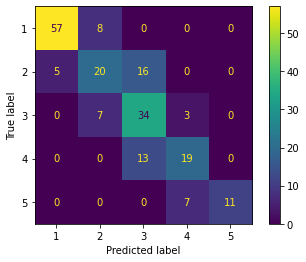

In [32]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions, zero_division=0))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=svcmodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=svcmodel.classes_)
disp.plot()

In [33]:
# Using the GridSeacrh method

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

param_grid = {'C':[200], 'gamma':[0.0001], 'kernel':['rbf']}

grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3)

grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.756 total time=   0.0s
[CV 3/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.738 total time=   0.0s
[CV 4/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.0s
[CV 5/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.769 total time=   0.0s


GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [200], 'gamma': [0.0001], 'kernel': ['rbf']},
             verbose=3)

In [34]:
grid.best_params_

{'C': 200, 'gamma': 0.0001, 'kernel': 'rbf'}

In [35]:
grid.best_estimator_

SVC(C=200, gamma=0.0001, random_state=2021)

In [36]:
predictions = grid.predict(X_test)
predictions

array([3, 3, 2, 1, 3, 1, 2, 1, 1, 3, 3, 3, 1, 4, 1, 1, 2, 4, 5, 2, 2, 3,
       3, 3, 4, 1, 4, 2, 1, 2, 4, 1, 1, 1, 5, 4, 1, 1, 5, 1, 3, 1, 3, 1,
       3, 4, 3, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 1, 3, 3, 5, 4, 4, 3, 3, 1,
       3, 1, 2, 1, 3, 3, 1, 5, 3, 4, 4, 1, 3, 3, 4, 2, 2, 3, 1, 3, 1, 4,
       2, 3, 3, 1, 4, 3, 2, 3, 5, 3, 2, 2, 3, 3, 1, 4, 2, 4, 5, 3, 1, 3,
       2, 5, 3, 1, 1, 4, 1, 4, 1, 4, 4, 3, 2, 1, 4, 2, 4, 1, 4, 3, 2, 5,
       4, 1, 2, 4, 2, 1, 2, 1, 2, 1, 1, 5, 1, 4, 3, 1, 3, 1, 3, 2, 3, 2,
       1, 1, 1, 5, 1, 4, 2, 5, 2, 3, 2, 2, 1, 1, 3, 5, 2, 1, 1, 4, 3, 4,
       2, 1, 3, 1, 2, 1, 3, 1, 1, 2, 3, 3, 2, 3, 2, 3, 1, 5, 5, 2, 1, 2,
       1, 2], dtype=int64)

              precision    recall  f1-score   support

           1       0.94      0.91      0.92        65
           2       0.66      0.61      0.63        41
           3       0.57      0.68      0.62        44
           4       0.58      0.56      0.57        32
           5       0.80      0.67      0.73        18

    accuracy                           0.72       200
   macro avg       0.71      0.69      0.69       200
weighted avg       0.73      0.72      0.72       200

You have got  0.72000 accuracy  in this prediction


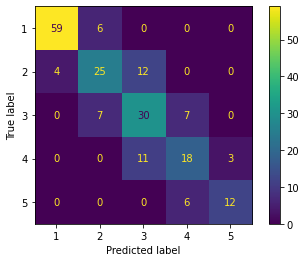

In [37]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.5f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

cm = confusion_matrix(y_test, predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.7.0


In [39]:
X = training.drop(['writing score'], axis=1)
y = training[['writing score']]

scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [40]:
X_scaled.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,1.0,0.25,1.0,1.0,0.0,0.72,0.662651
1,1.0,0.50,0.2,1.0,1.0,0.69,0.879518
2,1.0,0.25,0.8,1.0,0.0,0.90,0.939759
3,0.0,0.00,0.6,0.0,0.0,0.47,0.481928
4,0.0,0.50,0.2,1.0,0.0,0.76,0.734940


In [41]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=7, activation=activation))
    model.add(Dense(8,  activation=activation))
    model.add(Dense(1,  activation='relu'))
    
    model.compile(loss='mae',
                  optimizer = tf.optimizers.Adam(learning_rate),
                  metrics = ['mae', 'mse', 'accuracy'])
    return model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=2021)

In [43]:
TUNING_DICT = {
    'activation'    : ['relu','sigmoid'],
    'learning_rate' : [0.1, 0.001, 0.0001]
}

kf = KFold(n_splits=5, shuffle=True, random_state=2021)

model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)
grid_search = GridSearchCV (estimator = model,
                            param_grid = TUNING_DICT,
                            cv = kf,
                            scoring = 'neg_mean_absolute_error',
                            refit='True',
                            verbose=1)

grid_search.fit(X_train, y_train, validation_split=0.2, verbose=3)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/20


C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_6652/905081631.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)


Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001DD888C2C40>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'learning_rate': [0.1, 0.001, 0.0001]},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [44]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.182608 using {'activation': 'relu', 'learning_rate': 0.001}


In [45]:
best_mlp_model = grid_search.best_estimator_

predictions = best_mlp_model.predict(X_test)
predictions

array([0.4714955 , 0.56534857, 0.24490392, 0.        , 0.62267834,
       0.        , 0.36831555, 0.0260781 , 0.09779777, 0.6606155 ,
       0.53931487, 0.3386016 , 0.        , 0.7404734 , 0.0956164 ,
       0.1145758 , 0.25330913, 0.7775368 , 1.2131078 , 0.22864851,
       0.12006414, 0.63878053, 0.62918544, 0.58363706, 0.5908551 ,
       0.09733202, 0.7105467 , 0.3651455 , 0.        , 0.22168395,
       0.8047159 , 0.        , 0.08913623, 0.05639018, 0.8867478 ,
       0.75815517, 0.10541001, 0.04607378, 1.1010816 , 0.02107646,
       0.47639495, 0.        , 0.4536746 , 0.0981802 , 0.3759942 ,
       0.61133736, 0.3641401 , 0.42441374, 0.11245704, 0.6856731 ,
       0.11113003, 0.35193783, 0.        , 0.8351088 , 0.        ,
       0.40219414, 0.        , 0.        , 0.700103  , 0.45967287,
       1.1039062 , 0.702099  , 0.6665794 , 0.5778428 , 0.56035066,
       0.        , 0.52085483, 0.12871075, 0.33651647, 0.        ,
       0.56815404, 0.6926958 , 0.        , 0.9915182 , 0.38630

In [46]:
predictions = predictions.reshape(predictions.shape[0], 1)
predictions

array([[0.4714955 ],
       [0.56534857],
       [0.24490392],
       [0.        ],
       [0.62267834],
       [0.        ],
       [0.36831555],
       [0.0260781 ],
       [0.09779777],
       [0.6606155 ],
       [0.53931487],
       [0.3386016 ],
       [0.        ],
       [0.7404734 ],
       [0.0956164 ],
       [0.1145758 ],
       [0.25330913],
       [0.7775368 ],
       [1.2131078 ],
       [0.22864851],
       [0.12006414],
       [0.63878053],
       [0.62918544],
       [0.58363706],
       [0.5908551 ],
       [0.09733202],
       [0.7105467 ],
       [0.3651455 ],
       [0.        ],
       [0.22168395],
       [0.8047159 ],
       [0.        ],
       [0.08913623],
       [0.05639018],
       [0.8867478 ],
       [0.75815517],
       [0.10541001],
       [0.04607378],
       [1.1010816 ],
       [0.02107646],
       [0.47639495],
       [0.        ],
       [0.4536746 ],
       [0.0981802 ],
       [0.3759942 ],
       [0.61133736],
       [0.3641401 ],
       [0.424

In [47]:
predictions_unscaled = scaler_y.inverse_transform(predictions)
predictions_unscaled[:10]

array([[2.885982 ],
       [3.2613943],
       [1.9796157],
       [1.       ],
       [3.4907134],
       [1.       ],
       [2.4732623],
       [1.1043124],
       [1.391191 ],
       [3.642462 ]], dtype=float32)

In [48]:
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_test_unscaled[:10]

array([[2.],
       [4.],
       [2.],
       [1.],
       [4.],
       [1.],
       [2.],
       [1.],
       [1.],
       [3.]])